<a href="https://colab.research.google.com/github/qsquentinsmith/FundamentalsDataScience/blob/main/05_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 05: Classification
## INET 4061
### Author: Quentin Smith

We will be using the Caravan insurance dataset from Kaggle. 

Data from Kaggle: https://www.kaggle.com/uciml/caravan-insurance-challenge#caravan-insurance-challenge.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from scipy import interp
from sklearn.metrics import roc_curve, auc

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
from google.colab import files
files.upload()

Saving caravan-insurance-challenge.csv to caravan-insurance-challenge.csv


{'caravan-insurance-challenge.csv': b'ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN\r\ntrain,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0\r\ntrain,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,

In [5]:
df = pd.read_csv("caravan-insurance-challenge.csv")

# Data

In [6]:
df.shape

(9822, 87)

In [7]:
df.isnull()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9818,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [8]:
df.head(20)

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,train,23,1,2,1,5,0,5,0,5,0,6,3,3,5,2,0,5,4,2,0,0,4,2,2,2,2,2,4,2,9,0,5,3,3,9,0,5,2,3,...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,train,39,2,3,2,9,2,2,0,5,7,2,0,0,3,6,0,4,5,0,0,0,4,1,5,0,1,4,5,0,6,3,8,0,1,9,0,4,3,3,...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,train,33,1,2,3,8,0,7,0,2,7,2,0,0,5,4,0,3,6,2,0,0,2,5,2,2,1,2,5,2,0,9,4,4,2,6,3,2,5,3,...,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,train,33,1,2,4,8,0,1,3,6,6,0,3,3,3,3,0,1,8,1,1,0,1,8,1,1,1,0,8,1,9,0,5,2,3,7,2,7,2,1,...,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,train,11,2,3,3,3,3,5,0,2,7,0,2,2,2,6,0,4,5,2,0,0,3,3,3,1,2,1,4,2,0,9,6,1,2,6,3,2,3,3,...,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Not Insured:  9236
Insured:  586


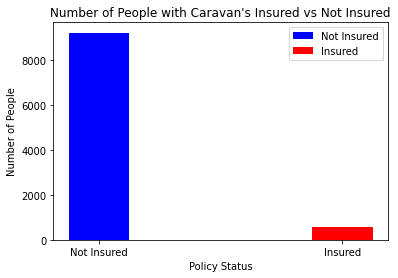

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


Not_Insured_with_caravan = sum(df['CARAVAN'] == 0)
Insured_with_caravan = sum(df['CARAVAN'] == 1)

plt.bar('Not Insured', Not_Insured_with_caravan, color = 'b', width = 0.25, label='Not Insured')
plt.bar('Insured', Insured_with_caravan, color = 'r', width = 0.25, label='Insured')

#X = np.arange(1)
print("Not Insured: ",Not_Insured_with_caravan)
print("Insured: ", Insured_with_caravan)

plt.title("Number of People with Caravan's Insured vs Not Insured")
plt.xlabel("Policy Status")
plt.ylabel("Number of People")
plt.legend(loc='upper right')

### Do we have any null values?
NO

### How many rows and columns do we have?
Rows: 9822, Columns: 87

### What is the target variable?
CARAVAN

### By filtering on the target variable, how many policies do we have and how many non-policies do we have?
Not Insured: 9236 Insured: 586

### Is our data unbalanced on the target variable?
Yes it is unbalanced.

# Examples of Resampling

Not Insured:  9236
Insured:  9236


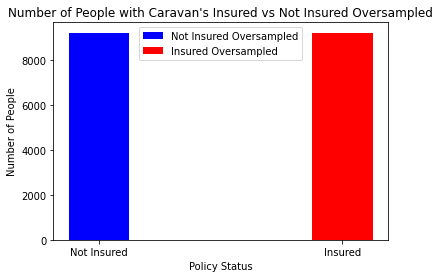

In [11]:
from sklearn.utils import resample

not_insured= df[df['CARAVAN'] == 0]
insured = df[df['CARAVAN'] == 1]


insurance_upsampled = resample(insured,
                          replace=True, # sample with replacement
                          n_samples=len(not_insured), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_insured, insurance_upsampled])

upsampled_not_insured = sum(upsampled['CARAVAN'] == 0)
upsampled_insured = sum(upsampled['CARAVAN'] == 1)

plt.bar('Not Insured', upsampled_not_insured, color = 'b', width = 0.25, label='Not Insured Oversampled')
plt.bar('Insured', upsampled_insured, color = 'r', width = 0.25, label='Insured Oversampled')
plt.title("Number of People with Caravan's Insured vs Not Insured Oversampled")
plt.xlabel("Policy Status")
plt.ylabel("Number of People")
plt.legend(loc='upper center')

#X = np.arange(1)
print("Not Insured: ",upsampled_not_insured)
print("Insured: ", upsampled_insured)

# Train and Test

In [12]:
df_train = df[df.ORIGIN == 'train']
df_test = df[df.ORIGIN == 'test']

In [13]:
df_train_x = df_train.iloc[:, 1:-1]
df_train_y = df_train['CARAVAN']

df_test_x = df_test.iloc[:, 1:-1]
df_test_y = df_test['CARAVAN']

In [14]:
df_train_x.shape

(5822, 85)

In [15]:
df_train_y.shape

(5822,)

# Dealing with Unbalanced Data

In [16]:
# Random Undersampling
rus = RandomUnderSampler(random_state=77)
rus_x_train, rus_y_train = rus.fit_resample(df_train_x, df_train_y)

# Random Oversampling
#ENTER YOUR OWN CODE
ros = RandomOverSampler(random_state=23)
ros_x_train, ros_y_train = ros.fit_resample(df_train_x, df_train_y)

# SMOTE
sm = SMOTE(random_state=12, ratio=1.0)
sm_x_train, sm_y_train  = sm.fit_resample(df_train_x, df_train_y)

#put all the different datasets into a single list so we can iterate over it.
train_sample_labels = ["Unbalanced", "Undersample", "Oversample", "SMOTE"]
train_samples = [(df_train_x, df_train_y), (rus_x_train, rus_y_train), (ros_x_train, ros_y_train), (sm_x_train, sm_y_train)]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Models

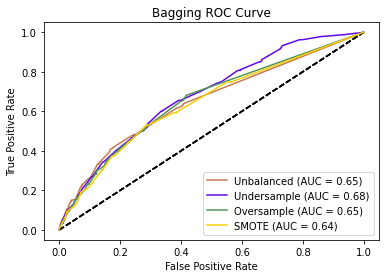

In [17]:
ensemble = []

i = 0
for sample in train_samples:
    bag = BaggingClassifier(None, 20, random_state = 1)
    bag.fit(sample[0],sample[1])
    y_pred_prob = bag.predict_proba(df_test_x)[:,1]
    fpr, tpr, thresholds = roc_curve(df_test_y, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    ensemble.append((roc_auc, "Bagging", train_sample_labels[i]))
    label='%s (AUC = %0.2f)' % (train_sample_labels[i], roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=label, color=np.random.rand(3))
    i += 1
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Boosting

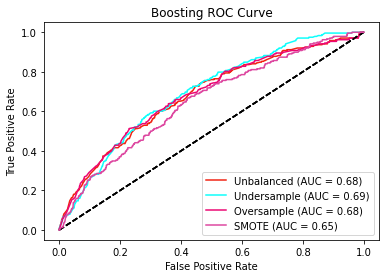

In [18]:
ensemble = []

i = 0
for sample in train_samples:
    boost = AdaBoostClassifier(None, 20, random_state = 1)
    boost.fit(sample[0],sample[1])
    y_pred_prob = boost.predict_proba(df_test_x)[:,1]
    fpr, tpr, thresholds = roc_curve(df_test_y, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    ensemble.append((roc_auc, "Boosting", train_sample_labels[i]))
    label='%s (AUC = %0.2f)' % (train_sample_labels[i], roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=label, color=np.random.rand(3))
    i += 1
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Boosting ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest

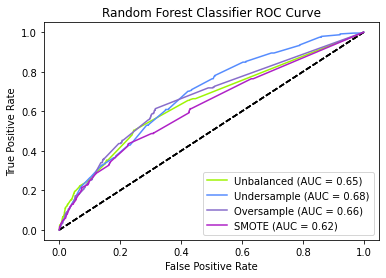

In [19]:
ensemble = []

i = 0
for sample in train_samples:
    rfc = RandomForestClassifier(20, random_state = 1)
    rfc.fit(sample[0],sample[1])
    y_pred_prob = rfc.predict_proba(df_test_x)[:,1]
    fpr, tpr, thresholds = roc_curve(df_test_y, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    ensemble.append((roc_auc, "Random Forest", train_sample_labels[i]))
    label='%s (AUC = %0.2f)' % (train_sample_labels[i], roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=label, color=np.random.rand(3))
    i += 1
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [20]:
ensemble.sort()
for classifier in ensemble:
    print(classifier)

(0.6238797751955646, 'Random Forest', 'SMOTE')
(0.6499007098852299, 'Random Forest', 'Unbalanced')
(0.6629753974955215, 'Random Forest', 'Oversample')
(0.6831176649288103, 'Random Forest', 'Undersample')
